In [1]:
import os
from glob import glob 
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
from matplotlib.colors import ListedColormap
from matplotlib import colors
import seaborn as sns
import numpy as np
import geopandas as gpd
from shapely.geometry import mapping, box
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set_style('white')
sns.set(font_scale=1.5)

# Download data and set working directory
data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

def CreatePath(input_path, inp_p, output_path, out_p):
    # Создаем путь к снимку
    path_pic1 = os.path.join(input_path, inp_p)

    # Генерируем список tif файлов
    list_pic1 = glob(os.path.join(path_pic1))

    # Сортируем спектральные полосы 
    list_pic1.sort()
    
    # Создаем выходной массив 
    path_out1 = os.path.join(output_path, out_p)

    # Получим новый список с уложенными друг на друга полосами
    pic1, meta1 = es.stack(list_pic1, path_out1)
    
    #вернем список полос
    return pic1

def Graph(index, color, name):
    fig, ax = plt.subplots(figsize=(12, 12))
    
    ep.plot_bands(index,
              cmap=color,
              vmin=-1, vmax=1,
              title=name,
              ax=ax,
              scale=False)
    plt.show()

In [2]:
pic1 = CreatePath("2018.08.28", "*band*.tif", "my_outputs", "out.tif") #28 августа

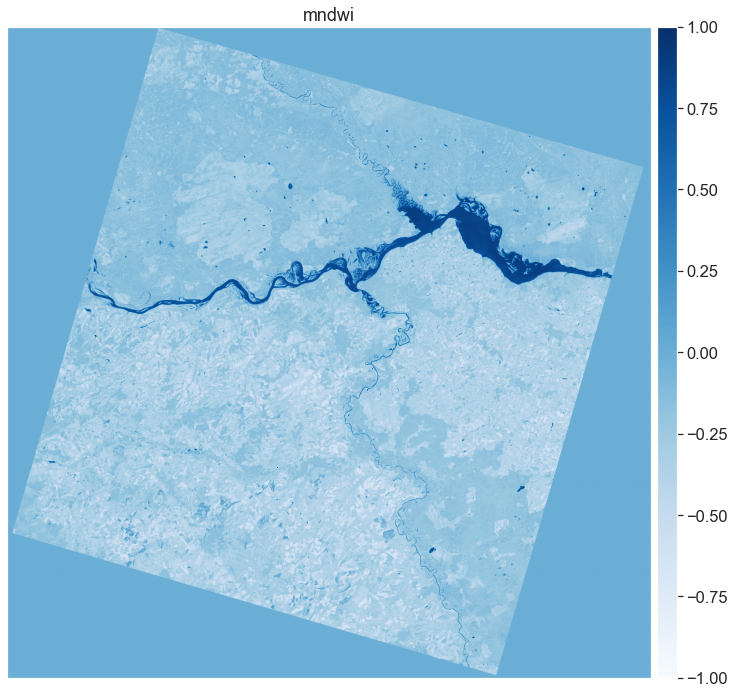

In [69]:
#MNDWI = (Green[2] - SWIR2[6]) / (Green[2] + SWIR2[6])
mndwi = (pic1[2] - pic1[6]) / (pic1[2] + pic1[6])
Graph(mndwi, 'Blues', "mndwi")

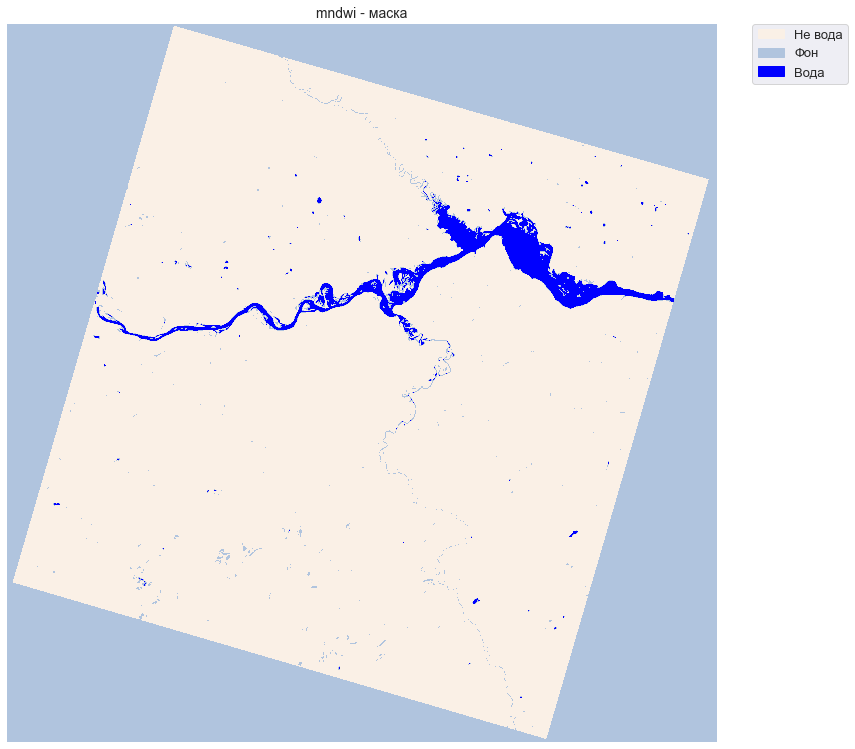

In [6]:
# Классифицируем
mndwi_class_bins = [-np.inf, 0,  0.18, np.inf]
mndwi_landsat_class = np.digitize(mndwi, mndwi_class_bins)

# Применим маску к классам
mndwi_landsat_class = np.ma.masked_where(np.ma.getmask(mndwi), mndwi_landsat_class)

# Сolor map
mndwi_colors = ["linen", "lightsteelblue", "blue"]
mndwi_cmap = ListedColormap(mndwi_colors)

# Назовем классы
mndwi_class_names = [
    "Не вода",
    "Фон",
    "Вода",
]

# Создадим список классов
classes = np.unique(mndwi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Отобразим результат
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(mndwi_landsat_class, cmap=mndwi_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=mndwi_class_names)
ax.set_title("mndwi - маска", fontsize=14)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

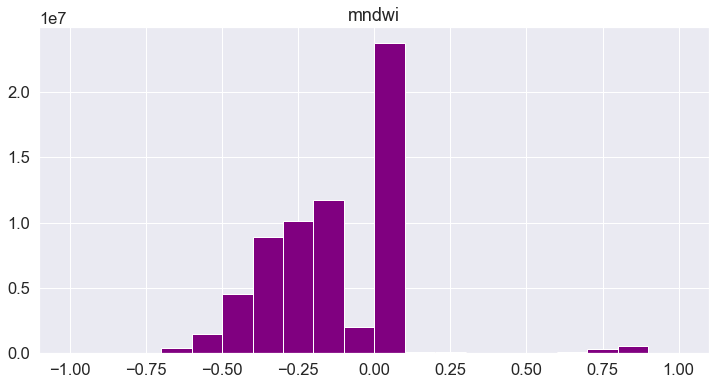

In [70]:
mndwi[mndwi < -1] = -1
mndwi[mndwi > 1] = 1
ep.hist(mndwi,
        figsize=(12, 6),
        title=["mndwi"])

plt.show()

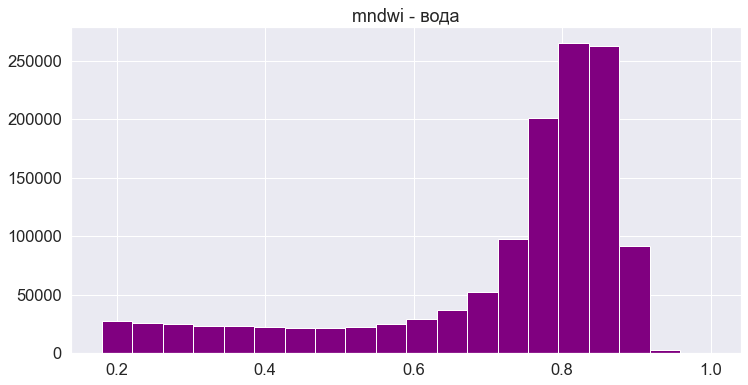

In [71]:
ep.hist(mndwi[mndwi>=0.18],
        figsize=(12, 6),
        title=["mndwi - вода"])

plt.show()

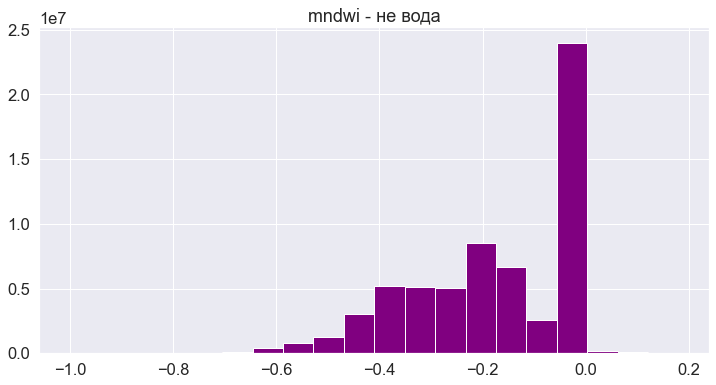

In [72]:
#максимум здесь - скорей всего фон
ep.hist(mndwi[mndwi<0.18],
        figsize=(12, 6),
        title=["mndwi - не вода"])

plt.show()

In [3]:
pic2 = CreatePath("2016.10.09", "*band*.tif", "my_outputs", "out.tif") # 9 октября

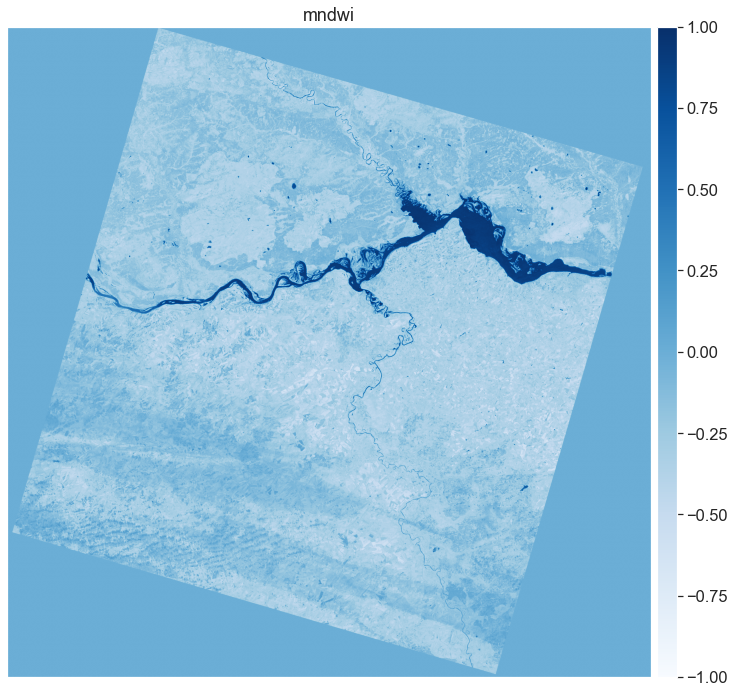

In [82]:
#MNDWI = (Green[2] - SWIR2[6]) / (Green[2] + SWIR2[6])
mndwi = (pic2[2] - pic2[6]) / (pic2[2] + pic2[6])
Graph(mndwi, 'Blues', "mndwi")

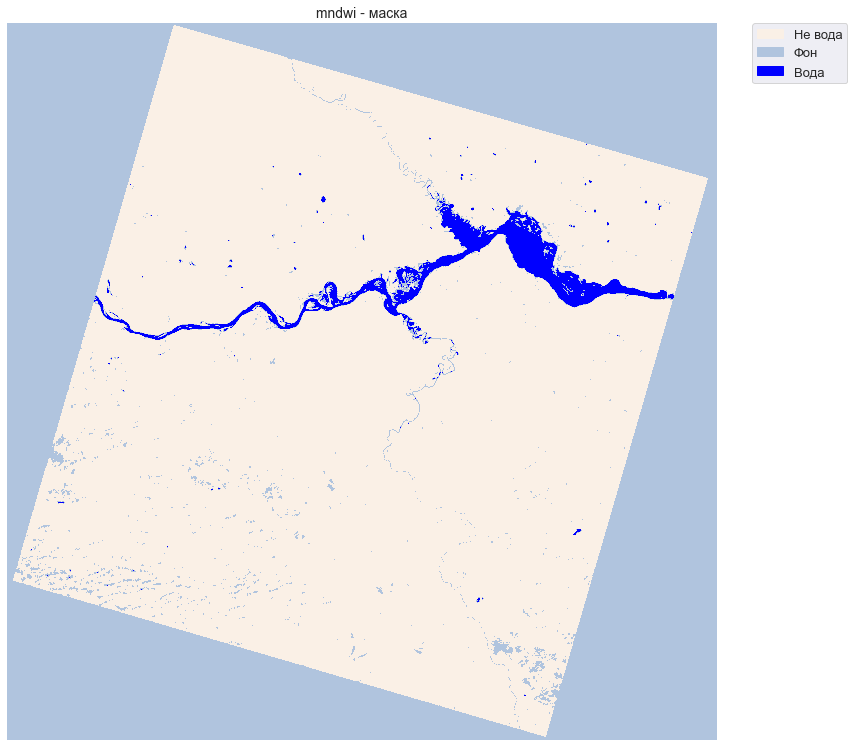

In [83]:
# Классифицируем
mndwi_class_bins = [-np.inf, 0,  0.18, np.inf]
mndwi_landsat_class = np.digitize(mndwi, mndwi_class_bins)

# Применим маску к классам
mndwi_landsat_class = np.ma.masked_where(np.ma.getmask(mndwi), mndwi_landsat_class)

# Сolor map
mndwi_colors = ["linen", "lightsteelblue", "blue"]
mndwi_cmap = ListedColormap(mndwi_colors)

# Назовем классы
mndwi_class_names = [
    "Не вода",
    "Фон",
    "Вода",
]

# Создадим список классов
classes = np.unique(mndwi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Отобразим результат
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(mndwi_landsat_class, cmap=mndwi_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=mndwi_class_names)
ax.set_title("mndwi - маска", fontsize=14)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

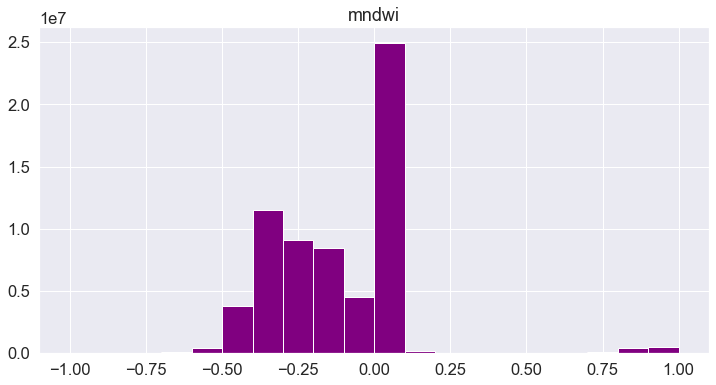

In [84]:
mndwi[mndwi < -1] = -1
mndwi[mndwi > 1] = 1
ep.hist(mndwi,
        figsize=(12, 6),
        title=["mndwi"])

plt.show()

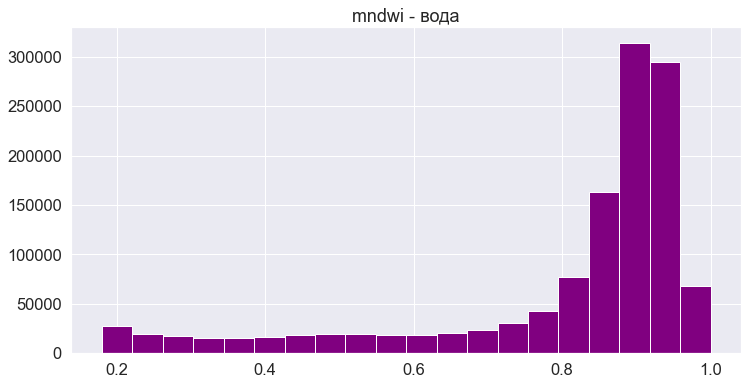

In [85]:
ep.hist(mndwi[mndwi>=0.18],
        figsize=(12, 6),
        title=["mndwi - вода"])

plt.show()

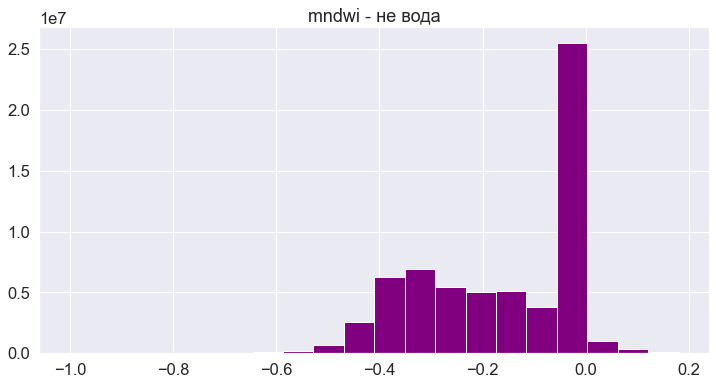

In [86]:
#максимум здесь - скорей всего фон
ep.hist(mndwi[mndwi<0.18],
        figsize=(12, 6),
        title=["mndwi - не вода"])

plt.show()

In [4]:
mndwi1 = (pic1[2] - pic1[6]) / (pic1[2] + pic1[6])
mndwi2 = ((pic2[2] - pic2[6]) / (pic2[2] + pic2[6]))[0:, 0:-10]
mndwi = mndwi2 - mndwi1

In [5]:
mndwi1[mndwi1 < -1] = -1
mndwi1[mndwi1 > 1] = 1
mndwi2[mndwi2 < -1] = -1
mndwi2[mndwi2 > 1] = 1

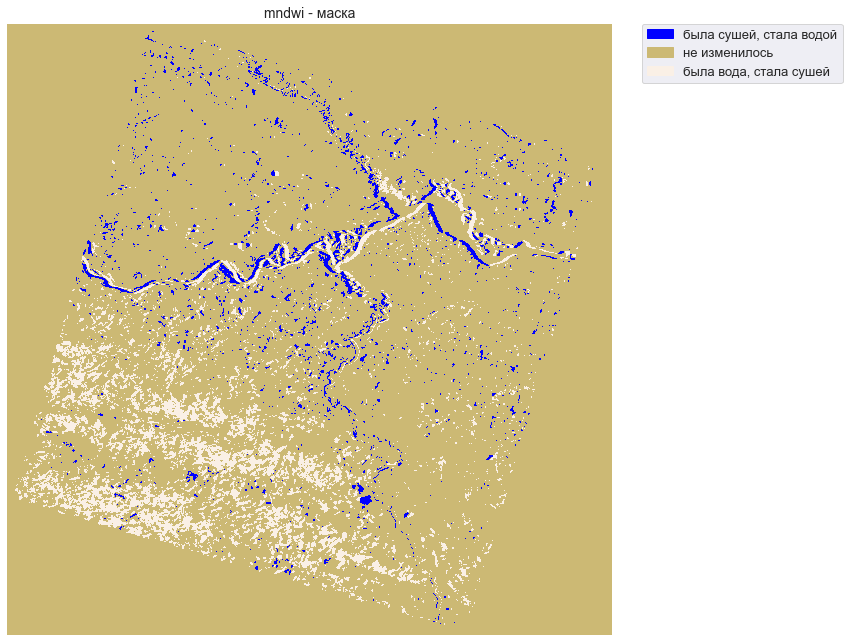

In [30]:
# Классифицируем
mndwi_class_bins = [-2,-0.25, 0.25, 2]
mndwi_landsat_class = np.digitize(mndwi, mndwi_class_bins)

# Применим маску к классам
mndwi_landsat_class = np.ma.masked_where(np.ma.getmask(mndwi), mndwi_landsat_class)

# Сolor map
mndwi_colors = ["blue", "y", "linen"]
mndwi_cmap = ListedColormap(mndwi_colors)

# Назовем классы
mndwi_class_names = [
    "была сушей, стала водой",
    "не изменилось",
    "была вода, стала сушей",
]

# Создадим список классов
classes = np.unique(mndwi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Отобразим результат
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(mndwi_landsat_class, cmap=mndwi_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=mndwi_class_names)
ax.set_title("mndwi - маска", fontsize=14)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

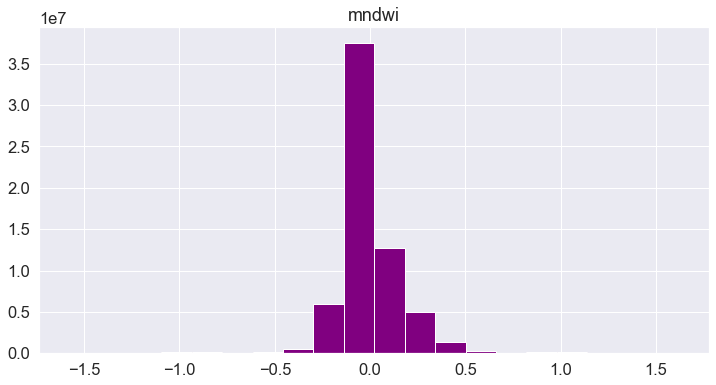

In [27]:
ep.hist(mndwi,
        figsize=(12, 6),
        title=["mndwi"])

plt.show()

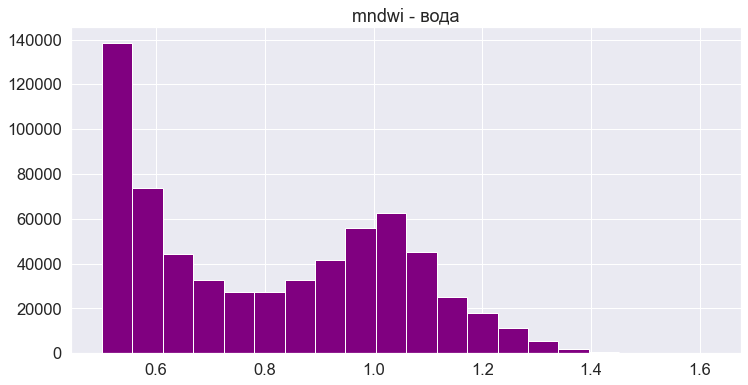

In [28]:
ep.hist(mndwi[mndwi>=0.5],
        figsize=(12, 6),
        title=["mndwi - вода"])

plt.show()

In [9]:
#количество пикслей воды 
print("Количество пикселей воды на фото 2018 года:", len(mndwi1[mndwi1>=0.18]), ", а значит водная площадь равна:", len(mndwi1[mndwi1>=0.18]) * 30, "кв метров")

Количество пикселей воды на фото 2018 года: 1278967 ,а значит водная площадь равна: 38369010 метров


In [10]:
print("Количество пикселей воды на фото 2016 года:", len(mndwi2[mndwi2>=0.18]), ", а значит водная площадь равна:", len(mndwi2[mndwi2>=0.18]) * 30, "кв метров")

Количество пикселей воды на фото 2016 года: 1239610 ,а значит водная площадь равна: 37188300 метров


In [11]:
print("Разница в пикселях:", abs(len(mndwi1[mndwi1>=0.18]) - len(mndwi2[mndwi2>=0.18])), ", разница в метрах:", abs(len(mndwi1[mndwi1>=0.18]) - len(mndwi2[mndwi2>=0.18])) * 30)

Разница в пикселях: 39357 ,разница в метрах: 1180710
